# Photo Classifier: Model evaluation

## Imports

In [1]:
import random
import numpy as np
import pandas as pd
from collections import Counter
from ipywidgets import interact
import ipywidgets as widgets

In [2]:
from file_io import load_pickle_file
from constants import MODEL_FILE_PATH, IMAGE_DATA_PATH
from image_transforms import IMAGE_TRANSFORMS
from interpreter import Interpreter

In [3]:
import random
random.seed(42)

In [4]:
DATA_SET = 'test'

## Load model and data

In [5]:
model = load_pickle_file(MODEL_FILE_PATH)
image_data = load_pickle_file(IMAGE_DATA_PATH)

## Prediction

In [6]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [7]:
y_pred, probabilities = model.predict(x, IMAGE_TRANSFORMS[DATA_SET])

## Results interpretation

In [8]:
interpreter = Interpreter(x, y_pred, y_true, probabilities, model.class_to_label_mapping)

In [9]:
accuracy = interpreter.calculate_accuracy()
accuracy

0.967741935483871

In [10]:
confusion_matrix = interpreter.calculate_confusion_matrix()
confusion_matrix

Prediction,Black bears,Grizzly bears,Teddybears
True,,,
Black bears,33,3,0
Grizzly bears,0,28,0
Teddybears,0,0,29


In [11]:
accuracy_by_label = interpreter.calculate_accuracy_by_label()
accuracy_by_label

,is_correct
label,
Black bears,0.916667
Grizzly bears,1.000000
Teddybears,1.000000


In [12]:
misclassified_samples = interpreter.get_misclassified_samples()
misclassified_samples

,true_label,predicted_label,propability_true,propability_predicted,is_correct
18,Black bears,Grizzly bears,0.083349,0.910948,False
32,Black bears,Grizzly bears,0.347272,0.643439,False
72,Black bears,Grizzly bears,0.399513,0.600477,False


In [13]:
most_uncertain_samples = interpreter.get_most_uncertain_samples(5)
most_uncertain_samples

,probability
sample,
72,0.600477
85,0.620382
27,0.641993
32,0.643439
1,0.673355


In [14]:
most_incorrect_samples = interpreter.get_most_incorrect_samples(5)
most_incorrect_samples

,probability
sample,
18,0.083349
32,0.347272
72,0.399513
85,0.620382
27,0.641993


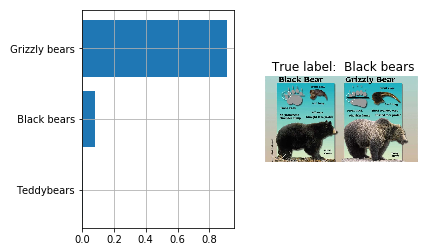

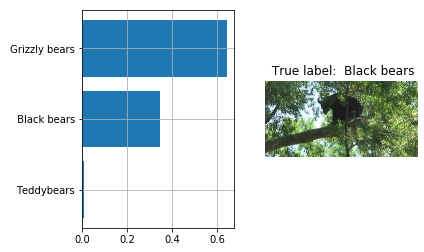

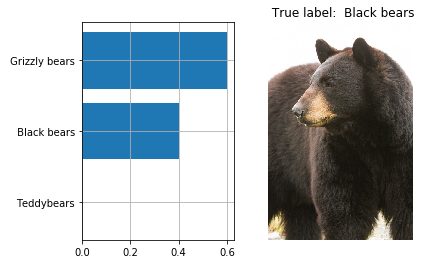

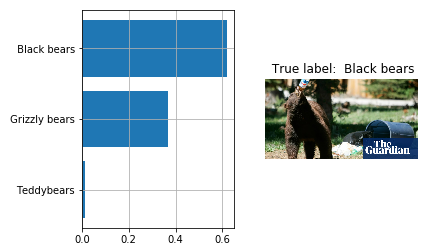

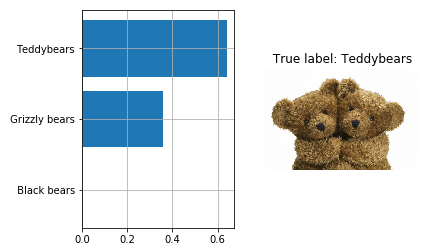

In [15]:
interpreter.plot_most_incorrect_samples(5)

In [16]:
@interact(index=widgets.IntSlider(min=0, max=len(y_true)-1, step=1, value=0, continuous_update=False))
def show_prediction(index=0):
    interpreter.plot_prediction(index)

interactive(children=(IntSlider(value=0, continuous_update=False, description='index', max=92), Output()), _do…